In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [77]:
import csv

df1 = pd.read_csv("price_demand_data.csv")
df2 = pd.read_csv("weather_data.csv")

In [78]:
# price_demand_data = df1
# weather_data = df2
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [79]:
df1.groupby('SETTLEMENTDATE')['TOTALDEMAND'].max()

SETTLEMENTDATE
1/01/2021 0:30     4179.21
1/01/2021 10:00    3336.79
1/01/2021 10:30    3333.31
1/01/2021 11:00    3275.27
1/01/2021 11:30    3291.46
                    ...   
9/08/2021 7:30     5843.21
9/08/2021 8:00     6158.28
9/08/2021 8:30     6372.55
9/08/2021 9:00     6519.36
9/08/2021 9:30     6493.33
Name: TOTALDEMAND, Length: 11664, dtype: float64

In [80]:
df2.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [81]:
# get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [82]:
df2.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [83]:
# merging to datasets
data = df1.merge(df2, left_on='Date', right_on='Date')
data["Date"] = pd.to_datetime(data.Date, format="%d/%m/%Y")
data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [84]:
#cleaning data from data
new_df=data.drop(['Evaporation (mm)', 'Sunshine (hours)','Direction of maximum wind gust ','Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)','SETTLEMENTDATE','REGION'], axis = 1)
new_df

,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
0,4179.21,LOW,2021-01-01,15.6,29.9,0.0,31.0
1,4047.76,LOW,2021-01-01,15.6,29.9,0.0,31.0
2,3934.70,LOW,2021-01-01,15.6,29.9,0.0,31.0
3,3766.45,LOW,2021-01-01,15.6,29.9,0.0,31.0
4,3590.37,LOW,2021-01-01,15.6,29.9,0.0,31.0
...,...,...,...,...,...,...,...
11658,5075.93,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11659,4861.91,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11660,4748.74,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11661,4620.09,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0


In [85]:
new_df.isnull().values.any()

True

In [86]:
new_df.isnull().sum()

TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)              48
Maximum temperature (°C)              48
Rainfall (mm)                         96
Speed of maximum wind gust (km/h)    144
dtype: int64

In [87]:
new_df1 = new_df.fillna(new_df.mean())
new_df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
0,4179.21,LOW,2021-01-01,15.6,29.9,0.0,31.0
1,4047.76,LOW,2021-01-01,15.6,29.9,0.0,31.0
2,3934.70,LOW,2021-01-01,15.6,29.9,0.0,31.0
3,3766.45,LOW,2021-01-01,15.6,29.9,0.0,31.0
4,3590.37,LOW,2021-01-01,15.6,29.9,0.0,31.0
...,...,...,...,...,...,...,...
11658,5075.93,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11659,4861.91,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11660,4748.74,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0
11661,4620.09,MEDIUM,2021-08-31,11.0,20.1,0.0,61.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PRICECATEGORY', ylabel='count'>

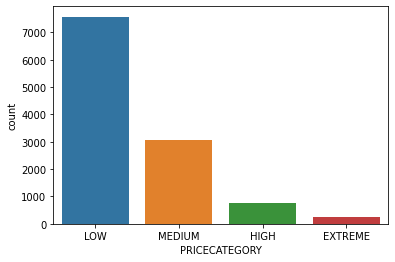

In [88]:
sns.countplot(new_df1['PRICECATEGORY'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Minimum temperature (°C)', ylabel='count'>

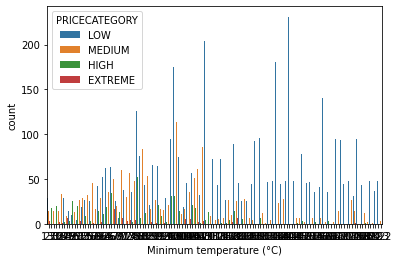

In [89]:
sns.countplot(new_df1['Minimum temperature (°C)'],hue=new_df1['PRICECATEGORY'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date', ylabel='count'>

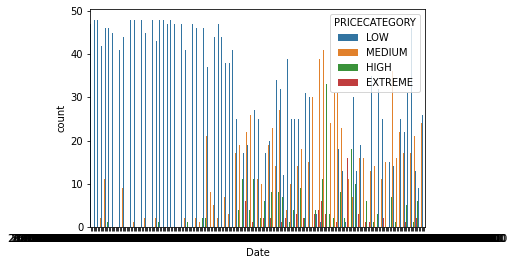

In [90]:
sns.countplot(new_df1['Date'],hue=new_df1['PRICECATEGORY'])

In [91]:
#Train Test Split
#Split our dataset into train and test to "train" our model before using the "test" set to evaluate our model.
#A common split is to have 80% on training and 20% on test.

In [92]:
new_df2 = new_df1[['TOTALDEMAND','Rainfall (mm)','Maximum temperature (°C)','Minimum temperature (°C)','PRICECATEGORY']]
new_df2

,TOTALDEMAND,Rainfall (mm),Maximum temperature (°C),Minimum temperature (°C),PRICECATEGORY
0,4179.21,0.0,29.9,15.6,LOW
1,4047.76,0.0,29.9,15.6,LOW
2,3934.70,0.0,29.9,15.6,LOW
3,3766.45,0.0,29.9,15.6,LOW
4,3590.37,0.0,29.9,15.6,LOW
...,...,...,...,...,...
11658,5075.93,0.0,20.1,11.0,MEDIUM
11659,4861.91,0.0,20.1,11.0,MEDIUM
11660,4748.74,0.0,20.1,11.0,MEDIUM
11661,4620.09,0.0,20.1,11.0,MEDIUM


In [93]:
#The Class Label  𝑦  will be PRICECATEGORY; a feature consisting of 0=False and 1=True.
# Features (get all columns except the last one which is our label has_diabetes)
X = new_df2[new_df2.columns[:-1]]
X.head()

,TOTALDEMAND,Rainfall (mm),Maximum temperature (°C),Minimum temperature (°C)
0,4179.21,0.0,29.9,15.6
1,4047.76,0.0,29.9,15.6
2,3934.70,0.0,29.9,15.6
3,3766.45,0.0,29.9,15.6
4,3590.37,0.0,29.9,15.6


In [94]:
# Class label
y = new_df2['PRICECATEGORY']
y.head()

0    LOW
1    LOW
2    LOW
3    LOW
4    LOW
Name: PRICECATEGORY, dtype: object

In [95]:
#A train test split using 80% for train and 20% for test.Use train_test_split from sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

In [96]:
X_train.head()

,TOTALDEMAND,Rainfall (mm),Maximum temperature (°C),Minimum temperature (°C)
1297,4173.50,0.0,25.5,15.4
5065,5006.57,1.0,15.1,11.5
4254,4286.43,0.0,18.9,9.8
7053,4954.22,0.4,15.0,9.8
4194,5007.09,1.0,18.2,13.8


In [97]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# initialise the tree
dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state=42, # the random state to run this at
                            max_depth=3 # the depth of the tree
)

# fit it to the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [98]:
# assign y_pred to the predictions of the DT given the X_test
y_pred = dt.predict(X_test)
y_pred

array(['LOW', 'LOW', 'MEDIUM', ..., 'LOW', 'LOW', 'LOW'], dtype=object)

In [99]:
#Evaluate our model using accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7269609944277754

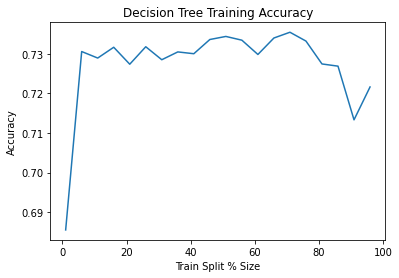

In [100]:
import matplotlib.pyplot as plt

# create split sizes from 1 to 100 in intervals of 5
split_sizes = range(1, 101, 5)

# initialise a dictionary of results
results = {}

for split in split_sizes:
    # train test split with the given split size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split/100, 
                                      test_size=(1 - split/100), random_state=42)
    
    # fit the model
    dt.fit(X_train, y_train)
    
    # predict
    y_pred = dt.predict(X_test)
    
    # assign the accuracy to the dictionary
    results[split] = accuracy_score(y_test, y_pred)
    
# plot the split sizes vs the dictionary of results
plt.plot(split_sizes, results.values())

plt.title("Decision Tree Training Accuracy")
plt.xlabel("Train Split % Size")
plt.ylabel("Accuracy")

plt.show()